## Phase 4.42.1 APPENDIX

# Deep NLP / Word Embeddings


# Introduction

- As mentioned in previous lessons, NLP is a process we use in order to have computers interpret language (strings).
- One of the methods we've learned previously is a **Bag of Words** representation.


- Today, we will learn about two other ways to address language. 
    1. Using **Word Embedding** to represent words in vector space,
    2. Using **Sequence Models** to capture the order of words and pick up on patterns that exist in language.

# Word Embeddings

- To begin, let's illustrate a **simple example** of points that can be related in space.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-talk')

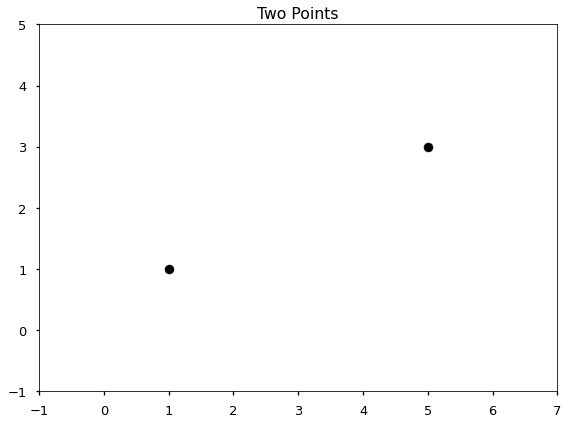

In [2]:
# Plot two points in two-dimensional space.
P1 = np.array((1, 1))
P2 = np.array((5, 3))

X, Y = zip(P1, P2)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, Y, color='black')
ax.set_xlim([-1, 7])
ax.set_ylim([-1, 5])
ax.set(title='Two Points')
fig.tight_layout()

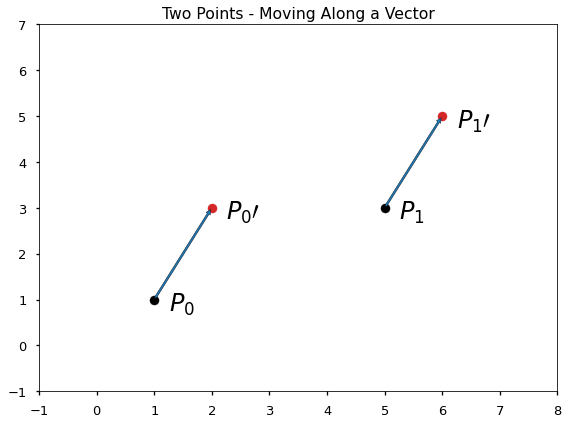

In [3]:
# Add relative points.
TRANSFORMATION = (1, 2)
P1_1, P2_1 = P1 + TRANSFORMATION, P2 + TRANSFORMATION
X_1, Y_1 = zip(P1_1, P2_1)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, Y, color='black')
ax.scatter(X_1, Y_1, color='tab:red')
ax.set_xlim([-1, 8])
ax.set_ylim([-1, 7])

POINT_LABELS = [
    ('$P_0$', P1),
    ('$P_1$', P2),
    ('$P_0\prime$', P1_1),
    ('$P_1\prime$', P2_1)
]
for label, p in POINT_LABELS:
    ax.annotate(label, xy=p, xytext=p+(0.25, -0.25), fontsize=24)
    
ax.annotate('', xy=P1_1, xytext=P1, arrowprops={'arrowstyle': 'simple'})
ax.annotate('', xy=P2_1, xytext=P2, arrowprops={'arrowstyle': 'simple'})

ax.set(title='Two Points - Moving Along a Vector')
fig.tight_layout()

- *The red points are both transformations of the black points along the same vector.*

- *In other words (linguistically),*

$$ \LARGE P_0\prime : \LARGE P_0 :: \LARGE P_1\prime : \LARGE P_1 $$

***This is the fundamental concept as to how Word Embeddings function.***

## Capturing Semantic Relationships

- Using Similarity Metrics, words can be said to be "alike" or "different".
- Word meanings and relationships can be captured and incorporated in modeling, rather than just a "lazy" encoded representation.
     - *We can see some great demonstrations and visualizations on the GloVe page: https://nlp.stanford.edu/projects/glove/*

*And an image from before...*
<img src='./images/embeddings.png'>

- Semantics are embedded into the vector space.
- The relationship between **King & Queen** is represented by the same vector relationship of **Man & Woman**.

---

***A different example...***

- *Imagine a model that assigned a value $ \{x | -1 \leq x \leq 1\} $ for each of the following dimensions:*

<img src='./images/vectors.png' width=600>

### Question:
- *When representing words using tf-idf or BoW, what common problem will we run into?*

## Word2Vec

### Overview
- Word2Vec is a deep neural network.
    - Includes: *Input Layer, Hidden Layer, Output Layer*
- The model examines a sequential "window" of words in a sentence.
---
***Example with a window of 5:***
<img src='./images/training_data.png'>



### What does it do?

- A Word2Vec model will use training data to generate word embeddings for each word.
- Using these embeddings, the model will be able to associate words together based on similarity metrics (discussed above).
    - The model uses a form of *reverse-sequence-generation*.
        - Rather than predicting a *word* given a *context*, **the model predicts a context given a word.**
        - This means that given the example word "fox" from above, the model should learn to predict the words "quick", "brown", "jumps", and "over", although crucially, not in any particular order.
        

- The hidden layer in the model will be used as a lookup table after training is complete.
---
***One-hot-encoded input. Accesses the word embedding. Returns resulting embedding.***

<img src='./images/matrix_mult_w_one_hot.png'>

> *For example, consider the sentence "**we have two cats as pets**".*
> - *You could easily substitute the word "cats" for "dogs" and the entire sentence would still make perfect sense.*
> - *While the meaning of the sentence is undoubtedly changed, there is also a lesson regarding the fact that both are nouns and pets.* 
> - *Without even worrying about the embedding space, you can easily understand that words that have similar meanings will likely also be used in many of the same kinds of sentences.* 
> - *The more similar words are, the more sentences in which they are likely to share context windows!* 
>     - *This is exactly what the model is learning, and this is why words that are similar end up near each other inside the embedding space.*

#### Opinion:
- ***What is the "opposite" of the word BOAT?***

### Training a Word2Vec Model

```python
#### Demo ###
# Training the model.
from gensim.models import Word2Vec

model = Word2Vec(data, size=100, window=5, min_count=1, workers=4)
```

#### Parameters
- the dataset you'll be training on
- `size`: the size of the word vectors you want to learn
- `window`: the window size to use when training the model
- `min_count`: the minimum number of times a word must be used in the corpus in order to be included in the training (for instance, `min_count=5` would only learn word embeddings for words that appear 5 or more times throughout the entire training set)
- `workers`: the number of threads to use for training, which can speed up processing (4 is typically used, since most processors nowadays have at least 4 cores).

Once you've instantiated the model, you'll still need to call the model's `.train()` method, and pass in the following parameters:

- The same dataset that you passed in at instantiation
- `total_examples`: the number of words in the model. You don't need to calculate this manually -- instead, you can just pass in the instantiated model's `.corpus_count` attribute for this parameter.
- The number of `epochs` to train the model for.

```python
# Training model.
model.train(data, total_examples=model.corpus_count)

# Accessing the Word2VecKeyedVectors
wv = model.wv

wv.most_similar('Cat') # Returns the most similar words to 'Cat'
wv.most_similar(negative='Cat') # Returns the least similar words to 'Cat'


wv['Cat'] # Returns the embedding array.

wv.vectors # Returns all arrays for all words.

wv.most_similar(positive=['king', 'woman'], negative=['man']) # Returns 'Queen' (theoretically).
```

- Additional Resources:
    - <a href='http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/'>Word2Vec Tutorial: P1</a>
    - <a href='http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/'>Word2Vec Tutorial: P2</a>

## GloVe: *Global Vectors for Word Representation*

- There are pretrained Word Embedding models that can be downloaded and used.
- There are various sizes and types of GloVe models and can be found in the **Download pre-trained word vectors** section of the link.
- Because of the computational resources available to Stanford *(the largest model is trained on 840B tokens, 2.2M vocab)*, this model will likely be more comprehensive than the ones we can train at home. However, we *can* get some interesting insights from training a model on a given set of texts.

> *https://nlp.stanford.edu/projects/glove/*

# Using Word Embeddings

There are two common ways to use embedding matrices.
1. **Mean Word Embeddings**
    - Given a document / text / tweet, you can look at the **mean embedding** for all the words.
    - This method will encapsulate the general idea of the sentence as **a single matrix**.
*Note: The curriculum advocates for the creation of an object which can be incorporated into a sklearn Pipeline. That code is provided here:*

```python
class W2vVectorizer:
    
    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])
    
    # Note: Even though it doesn't do anything, it's required that this object implement a fit method or else
    # it can't be used in a scikit-learn pipeline  
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])
```

*The downside with this method is clearly that by simply "rolling the words into a ball", you are again losing the context and order of the words...*

---
    

2. **Embedding Layers**
    - Embedding Layers are *layers* used exclusively in **Sequence Models**.
    - This layer stores the word embeddings for a dataset.
    
***Notes on use:***
- The Embedding Layer should always immediately follow the Input Layer.
- All words in the text should be label-encoded.
- The size of the Embedding Layer should always be greater than the total vocabulary size of the dataset.
    - The first parameter denotes the vocabulary size. The second parameter denotes the size of the word vectors.
- The size of the sequences (texts) must be converted to **padded sequences** in order to have the same length input.

> <a href='https://keras.io/api/layers/core_layers/embedding/'>*Documentation: Embedding Layer in Keras*</a>

# Sequence Models

**Sequence Models** are a class of neural networks that work with ordered data (ex: *Sentences* and *Time Series*).

These models are called **stateful** models, which means that in sequence generation the model *remembers* the most recent output in order to make its next output.
- *If a stateful model is generating text data, it will generate some output at timestep $\large x_t$.*
- *It will then use this output as input for its next generated output (timestep $\large x_t + 1$).*

<img src='./images/new-RNN-unrolled.png'>

> - *The current timestep is denoted with the input node $\large X_t$, which makes the previous timestep $\large X_{t-1}$ and the next timestep $\large X_{t+1}$.*
> - *$\large H_0$ represents the model's output for timestep $\large 0$, which will then be passed back into the model in $\large X_1$.*

## Recurrent Neural Networks

**Recurrent Neural Networks** are a type of *stateful model* which are very popular and we will be working with in TensorFlow!

### Use Cases
- **Text Classification**
    - RNNs examine one word at a time and *remember* what they've seen at each time step, rather than looking at any kind of *word frequency* (BoW / tf-idf).
- **Sequence Generation**
    - When trained on texts, a RNN can, given a prompt, generate some $n$-characters given the training data.
        - <a href='https://www.tensorflow.org/tutorials/text/text_generation'>TensorFlow Tutorial</a>
        
       - Below is an example text generated from a model trained on Shakespeare. Input into the model was `'Q'`.
       
> ```
> QUEENE:
> I had thought thou hadst a Roman; for the oracle,
> Thus by All bids the man against the word,
> Which are so weak of care, by old care done;
> Your children were in your holy love,
> And the precipitation through the bleeding throne.
> 
> BISHOP OF ELY:
> Marry, and will, my lord, to weep in such a one were prettiest;
> Yet now I was adopted heir
> Of the world's lamentable day,
> To watch the next way with his father with his face?
> 
> ESCALUS:
> The cause why then we are all resolved more sons.
> 
> VOLUMNIA:
> O, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, it is no sin it should be dead,
> And love and pale as any will to that word.
> 
> QUEEN ELIZABETH:
> But how long have I heard the soul for this world,
> And show his hands of life be proved to stand.
> 
> PETRUCHIO:
> I say he look'd on, if I must be content
> To stay him from the fatal of our country's bliss.
> His lordship pluck'd from this sentence then for prey,
> And then let us twain, being the moon,
> were she such a case as fills m
> ```

- **Sequence-to-Sequence Models**
    - These models map an *input sequence* to an *output sequence*. *(Think: Google Translate)*

***Completing a drawing based on a prompt and subject.***
<img src='./images/multi_sketch_mosquito.gif'>

***Adding color and content to an image***
<img src='./images/pix2pix.gif'>

### Backprop Through Time

- Rather than using the traditional Back Propagation that we've discussed, RNNs use an altered **BPTT** *(BackProp Through Time)*.
- Because the model is trained on sequence data, it has the potential to be right or wrong **at every point in that sequence**. 
    - *This means that you need to adjust the model's weights at each time point to effectively learn from sequence data.*
    
    
> - *! **Note:** BPTT is much more computationally expensive than traditional back propagation because the model has to update every weight at every time step.*
>     - *For instance, if a single data point is a sequence with 1000 time steps, then the model will perform a full round of back propagation for each of the 1000 points in that single sequence.*
> 
> *There is another type of BackProp developed with this in mind, **TBPTT** (Truncated BPTT), which breaks a long sequence into smaller chunks.*
>*For example, 1000 time steps gets propagated as 50 sequences of 20 units.*

## Layers
***The example below is demonstrating the way a RNN interacts with text. What is happening here?***
<img src='./images/unrolled.gif'>

### Gradient Problems
> - *One of the biggest problems with standard Recurrent Neural Networks is that they get **Saturated**.* 
> - *The problem with this it that they use a `sigmoid` or `tanh` activation function, and there are large areas of each function where the derivative is very, very close to 0.*
> - *When the derivatives are low, this means the weight updates are small, which means that the "learning" of the model slows to a crawl!*
>     - *This happens because after many, many weight updates, many weights will have been pushed into an extremely positive or extremely negative value.*


<img src='./images/new_vanishing_gradient.png'>

> - *All you have to do is get past -5 or +5 to get to very small values.*
>
> *When gradients are close to 0 because the values are extremely low, this is called **Vanishing Gradient**. Similarly, networks can also get to the point where the gradients are much, much large, resulting in massive weight updates that cause the model to thrash between 1 extremely wrong answer and another. When this happens, it is called **Exploding Gradient**. In practice, you can easily solve exploding gradients by just "clipping" the weight updates by bounding them at a maximum value. However, there's no good solution for vanishing gradients!*

---

The two layers we will discuss (GRUs and LSTMs) have the ability to retain *and forget* information.

As we looked at above, the further in the distance a word (point) gets in a sequence, the less important it gets.

### Gated Recurrent Units (GRU)
- Passes the "important" parts of its *initial state* at each time step.
- Uses two "gates" as a *catch-all* for what information to learn / forget.
    1. **Reset Gate**: determines what should be removed from the cell's internal state before passing itself along to the next time step.
    2. **Update Gate**: determines how much of the state from the previous time step should be used in the current time step.
    
<img src='./images/1_7oE-4Wg6bZ7u8yDf5cjJPA.png'>

> <a href='https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be'>*TDS: GRUs*</a>

### Long Short Term Memory Cells (LSTM)
- Specialized neurons that are able to effectively learn what information to "remember" and what to "forget".

<img src='./images/new_LSTM3_chain.png'>

- Uses three "gates".
    1. **Input Gate**: determines how much of the cell state that was passed along should be kept.
    2. **Forget Gate**: determines how much of the current state should be forgotten.
    3. **Output Gate**: determines how much of the current state should be exposed to the next layers in the network.

---

> <a href='https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21'>*TDS: Step by Step Illustrated Guide*</a>

# High Level Example: TensorFlow RNN with GloVe Embeddings 

## Preparing Data: Cleaning / Tokenizing / Padding
```
********************************************************************************
*                           Tokenizer Created & Fit                            *
********************************************************************************
Ex:
[['weather',
  'update',
  'a',
  'cold',
  'front',
  'from',
  'cuba',
  'that',
  'could',
  'pass',
  'over',
  'haiti'],
 ['says',
  'west',
  'side',
  'of',
  'haiti',
  'rest',
  'of',
  'the',
  'country',
  'today',
  'and',
  'tonight']]
********************************************************************************
*                              Series' Tokenized                               *
********************************************************************************
Ex:
[[191, 1845, 6, 422, 905, 21, 2656, 14, 130, 552, 74, 64],
 [519, 290, 949, 4, 64, 1315, 4, 1, 78, 265, 2, 1172]]
********************************************************************************
*                                  Tokenized                                   *
********************************************************************************
Ex:
array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  191, 1845,
           6,  422,  905,   21, 2656,   14,  130,  552,   74,   64],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  519,  290,
         949,    4,   64, 1315,    4,    1,   78,  265,    2, 1172]])
********************************************************************************
*                                   Finished                                   *
********************************************************************************
```

## Example Model Architecture

```python
# Import libraries
from tensorflow.keras import layers, models

# Instantiate model.
model = models.Sequential()

# Add Embedding Layer
model.add(
    layers.Embedding(
        input_dim=`vocab_length`, # Vocabulary size.
        output_dim=`n_dimensions_of_matrix`, # Shape of matrix for each word.
        weights=[`matrix`], # GloVe matrix, shape: (`vocab_length`, `n_dimensions_of_matrix`)
        input_length=`len_of_padded_sequences`, # Length of each array (sentence).
        trainable=False, # Whether we want to retrain the GloVe matrix weights.
        mask_zero=True # Showing that `0` is a padding and shouldn't be interpreted.
        )
    )

# Add BiDirectional layer.
model.add(layers.Bidirectional(layers.LSTM(`n_dimensions_of_matrix`)))

# Add Dense layer.
model.add(layers.Dense(64, activation='relu'))

# Add Output layer.
model.add(layers.Dense(1, activation='sigmoid'))
```

<img src='./images/bidirectional.png'>

---

> *BiDirectional*: 
> - *The main advantage of a bidirectional RNN is that the signal from the beginning of the input doesn't need to be processed all the way through every timestep to affect the output.*
> 
> - *The main disadvantage of a bidirectional RNN is that you can't efficiently stream predictions as words are being added to the end.*

> *Documentation: https://www.tensorflow.org/tutorials/text/text_classification_rnn*